In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


In [2]:
#we are analyze the stock Apple google Microsoft, Amazon
tech_list =['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Set up End and Start times for data Grabs
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

#for loop for grabing yahoo finance data and seting as a data frame
for stock in tech_list:
    #set dataframe as stock ticker
    globals()[stock] = DataReader(stock, 'yahoo', start,end)


In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN] 
company_name = ['APPLE', 'GOOGLE','MICROSOFT', 'AMAZON']

for company, company_name in zip(company_list, tech_list):
    company['company_name'] = company_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-08-27,3453.000000,3378.000000,3450.050049,3400.000000,4264800.0,3400.000000,AMZN
2020-08-28,3433.370117,3386.500000,3423.000000,3401.800049,2897000.0,3401.800049,AMZN
2020-08-31,3495.000000,3405.000000,3408.989990,3450.959961,4185900.0,3450.959961,AMZN
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400.0,3499.120117,AMZN
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3931500.0,3531.449951,AMZN
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100.0,3368.000000,AMZN
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800.0,3294.620117,AMZN
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200.0,3149.840088,AMZN
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700.0,3268.610107,AMZN


In [4]:
AAPL.describe()
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-10 to 2020-09-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


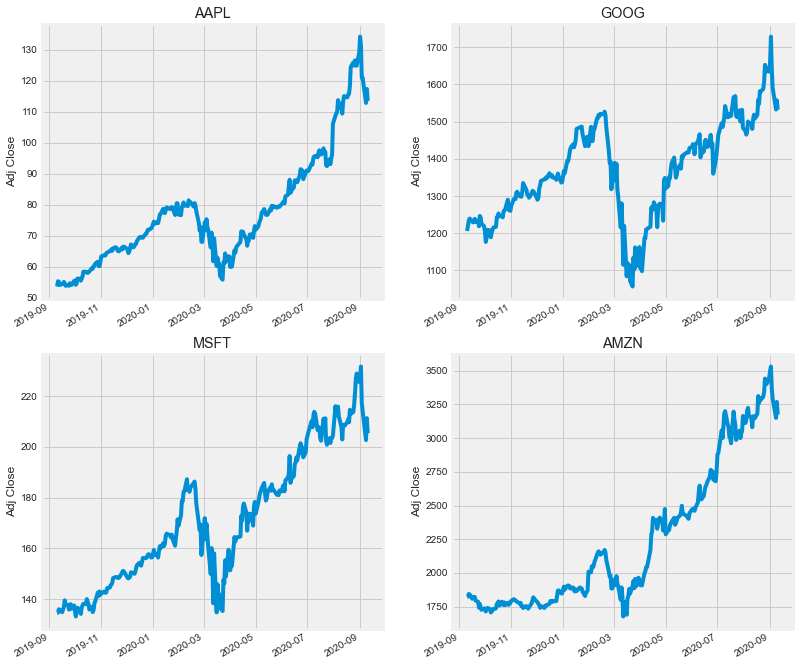

In [5]:
#let see the histrocial view of the  closing proce

plt.figure(figsize=(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")



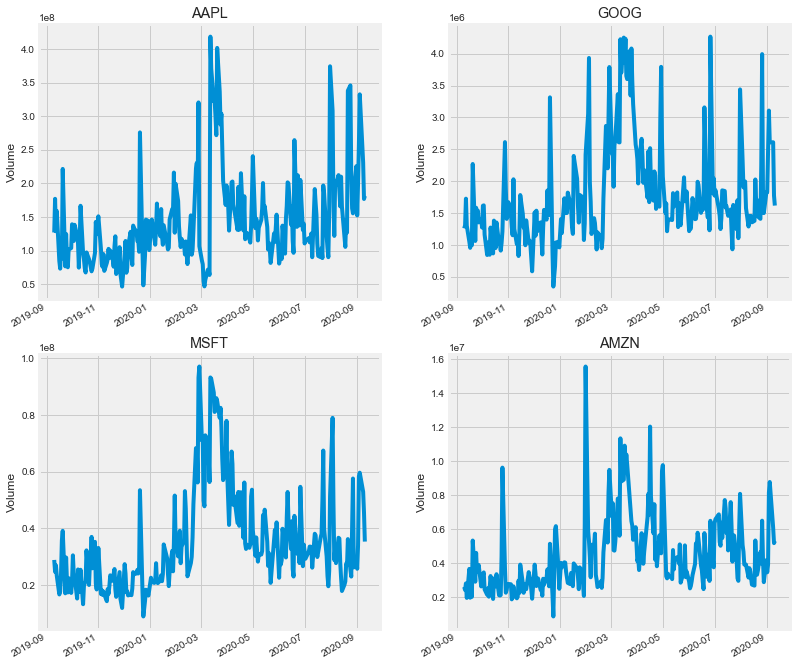

In [6]:
## now the plot the total Volume of stock being traded each day

plt.figure(figsize =(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")
    

In [7]:
##2. What was the moving Average of the stock 
ma_day =[10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
print(AMZN.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


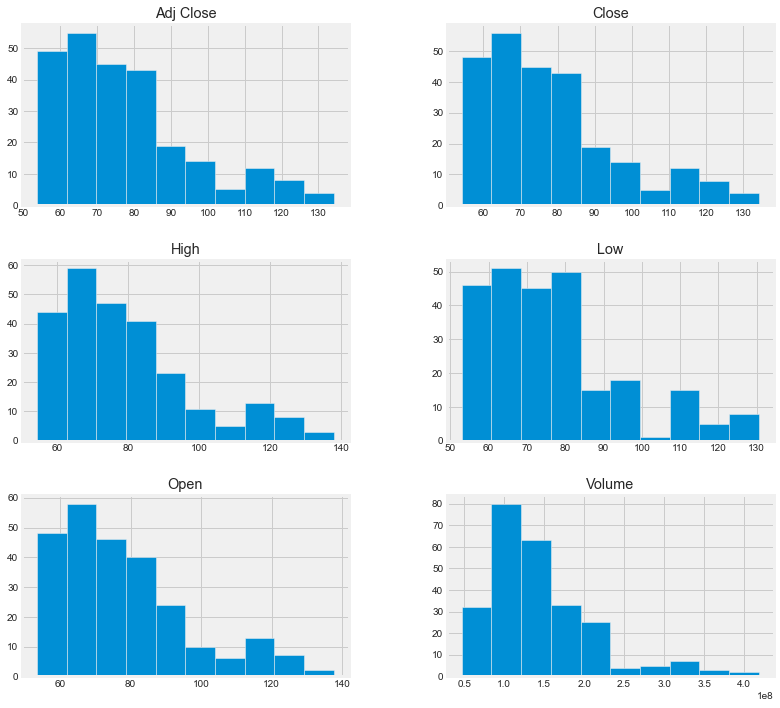

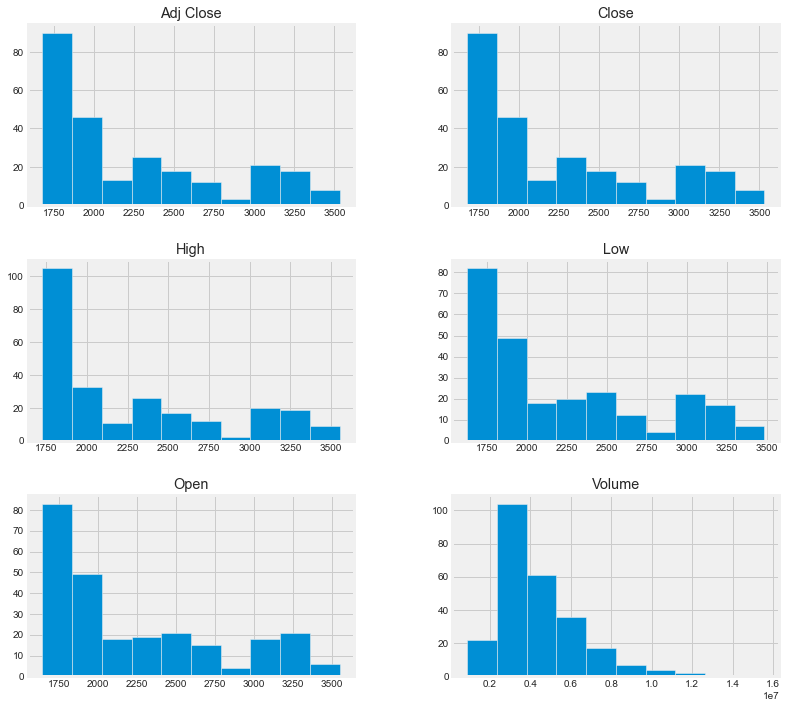

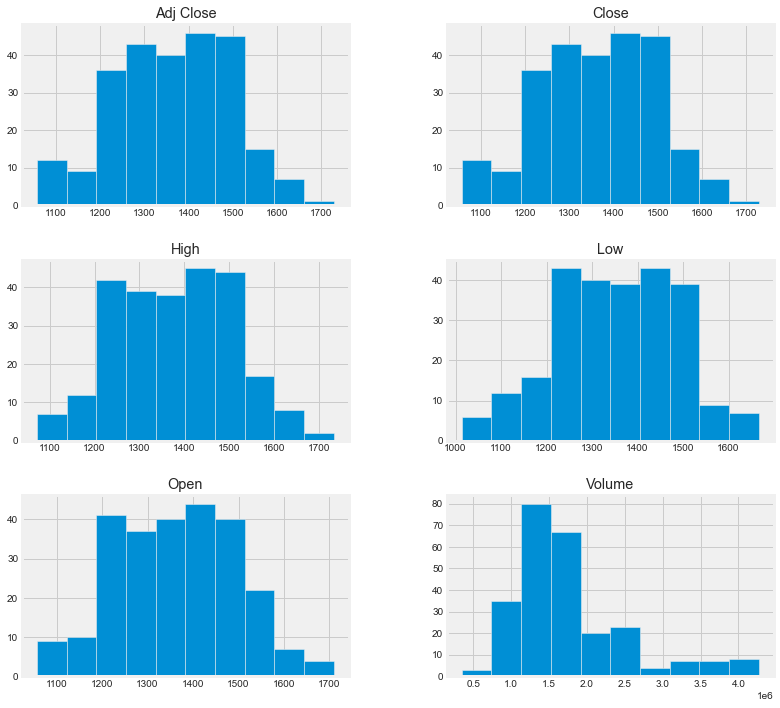

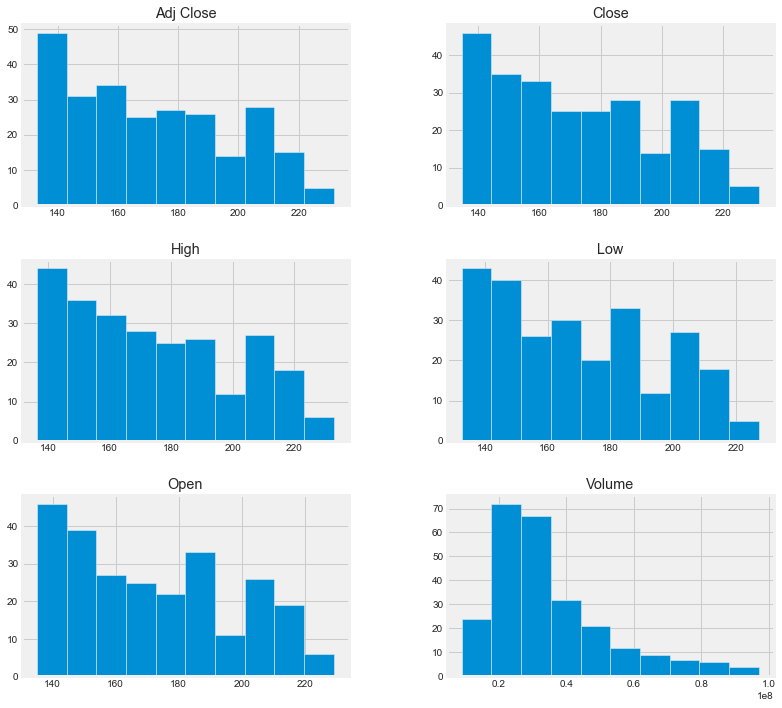

In [8]:

#Grab all the moving Average
df.groupby("company_name").hist(figsize=(12,12));

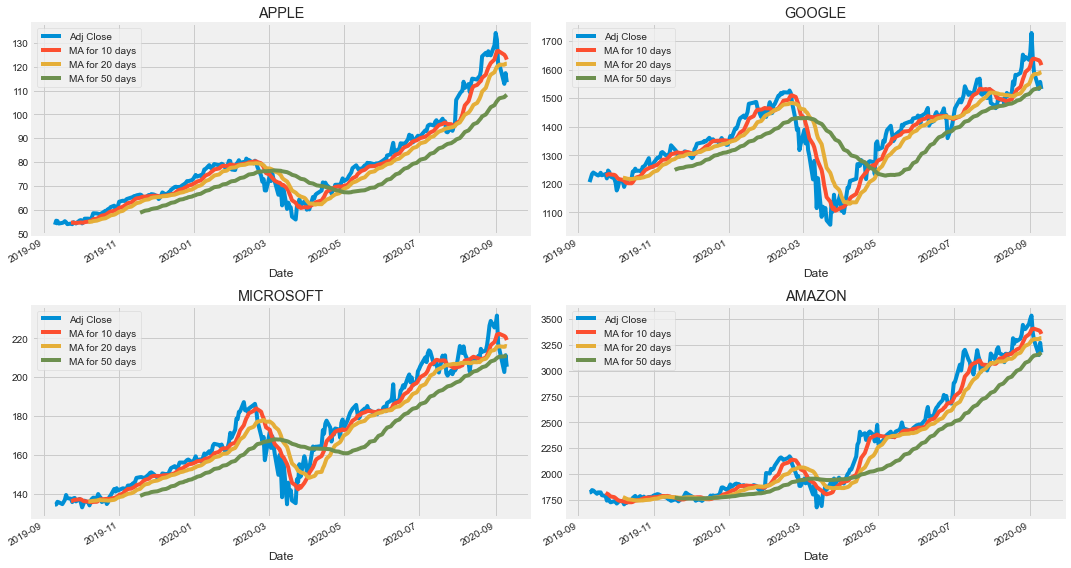

In [9]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


fig.tight_layout()



In [10]:
#Daily return on the stock 
# We'll use the pct_change to find percentage change for each day 

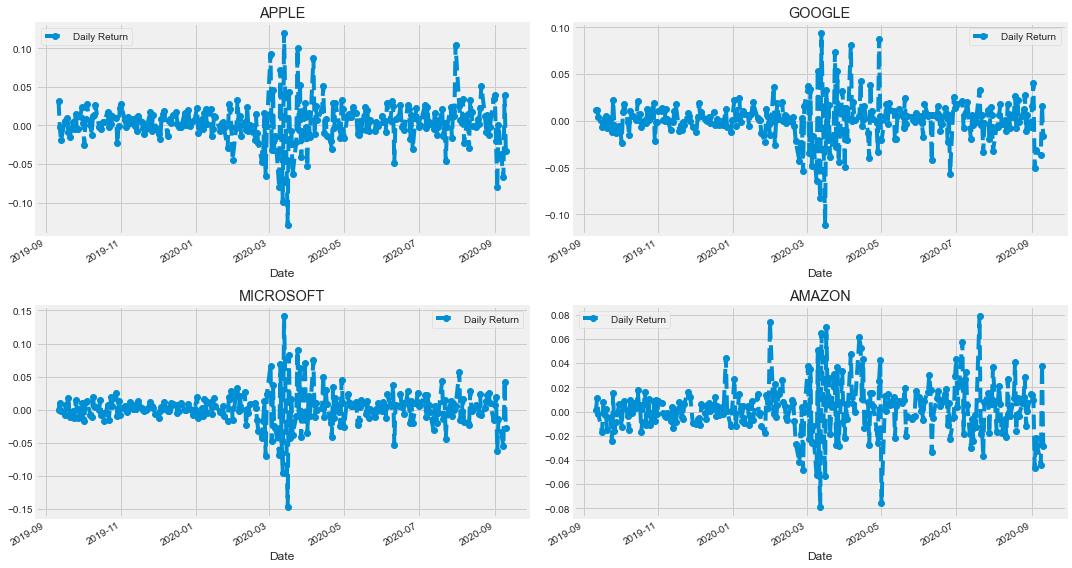

In [11]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
#use the drop NAN and draw daily return of the stock 

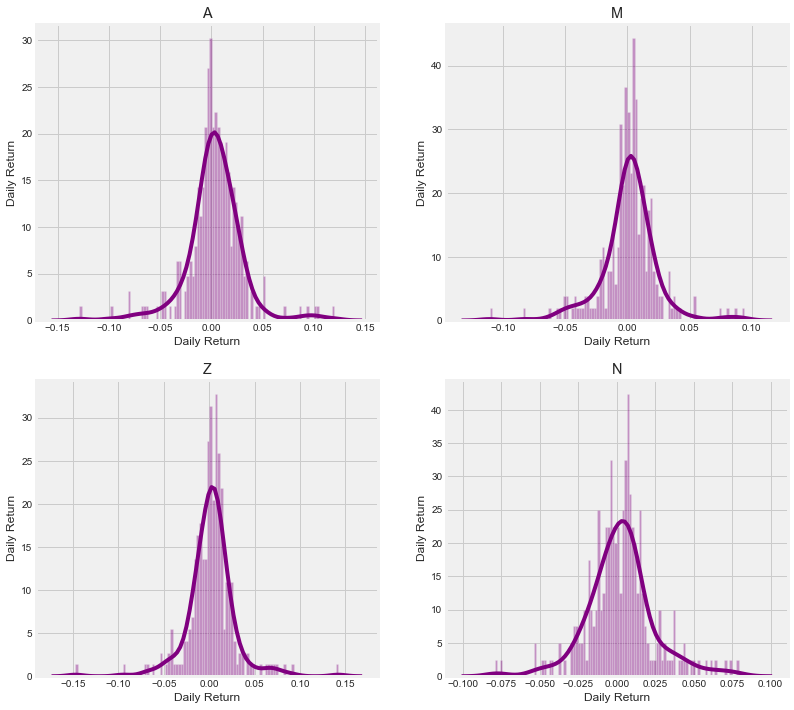

In [12]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
     plt.subplot(2,2,i)
     sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
     plt.ylabel('Daily Return')
     plt.title(f'{company_name[i-1]}')


In [13]:
#4. what is the correlation between differnet stocks closing prices
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']
#take a quick look at the closing df
closing_df.head(10)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-10,53.642761,1206.000000,134.548248,1820.550049
2019-09-11,55.348343,1220.170044,134.587753,1822.989990
2019-09-12,55.224567,1234.250000,135.972031,1843.550049
2019-09-13,54.150230,1239.560059,135.774261,1839.339966
2019-09-16,54.434902,1231.300049,134.795425,1807.839966
2019-09-17,54.632942,1229.150024,135.843506,1822.550049
2019-09-18,55.145359,1232.410034,136.960770,1817.459961
2019-09-19,54.697304,1238.709961,139.482071,1821.500000
2019-09-20,53.897728,1229.930054,137.870407,1794.160034


In [14]:
#make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-10,NaN,NaN,NaN,NaN
2019-09-11,0.031795,0.011750,0.000294,0.001340
2019-09-12,-0.002236,0.011539,0.010285,0.011278
2019-09-13,-0.019454,0.004302,-0.001454,-0.002284
2019-09-16,0.005257,-0.006664,-0.007209,-0.017126


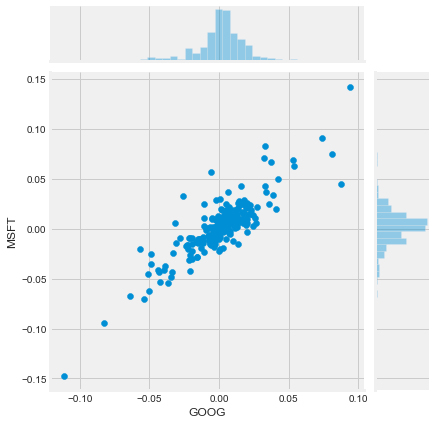

In [15]:
#compare return of Google and Microsoft. Obviously, two stocks are perfectly correlated with each other a linear relationship between its daily return values should occur.
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter')
#

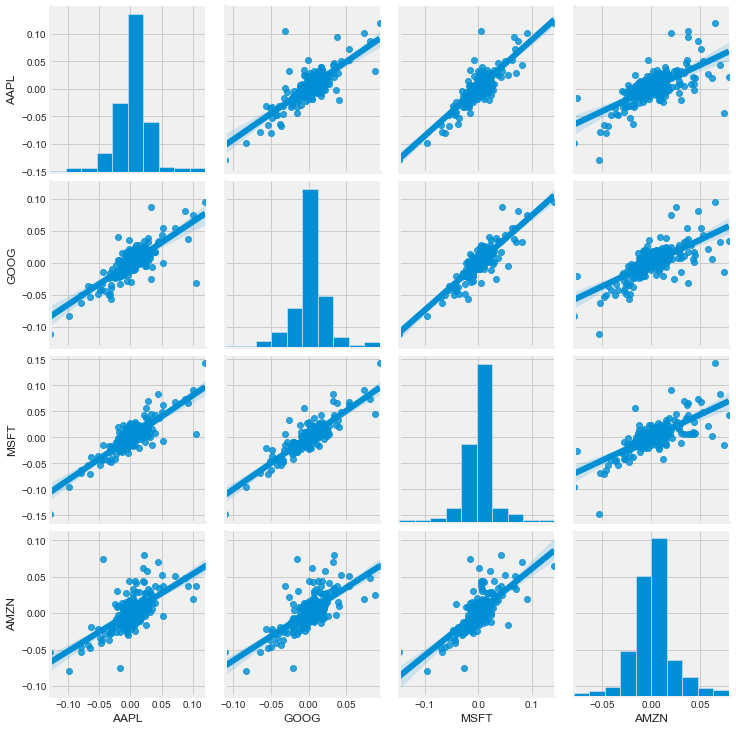

In [16]:
#use pairplot on our DataFrame for an automatic visual analysis
sns.pairplot(tech_rets, kind='reg')